# K-NN in python: search for the best k

## 1- Load the required modeules

In [21]:
import numpy as np
import pandas as pd                    # Llibreria matemÃ tica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
%matplotlib inline                     

## 2- Load the data

In [25]:
# Load digits dataset from scikit
smoking_dataset = pd.read_csv(filepath_or_buffer="Dataset/Normalized_Smoking.csv")

X = smoking_dataset.iloc[:, :-1]
y = smoking_dataset.loc[:, "smoking"]
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size = .3, random_state = 1)
print((X.min(), X.max()))

(gender          0.0
age             0.0
height          0.0
weight          0.0
waist           0.0
sightL          0.0
sightR          0.0
hearL           0.0
hearR           0.0
systolicP       0.0
diastolicP      0.0
fastBSugar      0.0
cholesterol     0.0
triglyceride    0.0
hdl             0.0
ldl             0.0
hemoglobin      0.0
uProtein        0.0
sCreatinine     0.0
ast             0.0
alt             0.0
gtp             0.0
caries          0.0
tartar          0.0
dtype: float64, gender          1.0
age             1.0
height          1.0
weight          1.0
waist           1.0
sightL          1.0
sightR          1.0
hearL           1.0
hearR           1.0
systolicP       1.0
diastolicP      1.0
fastBSugar      1.0
cholesterol     1.0
triglyceride    1.0
hdl             1.0
ldl             1.0
hemoglobin      1.0
uProtein        1.0
sCreatinine     1.0
ast             1.0
alt             1.0
gtp             1.0
caries          1.0
tartar          1.0
dtype: float64)


## 3- Simple cross-validation

In [32]:
# Let's do a simple cross-validation: split data into training and test sets (test 30% of data)
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, random_state=1)

# Create a kNN classifier object
knc = nb.KNeighborsClassifier()

# Train the classifier
knc.fit(X_train, y_train)

# Obtain accuracy score of learned classifier on test data
print(knc.score(X_test, y_test))



0.7351192263799627


In [33]:
# More information with confussion matrix
from sklearn.metrics import confusion_matrix

y_pred = knc.predict(X_test)
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

[[8361 2224]
 [2186 3878]]


In [34]:
# Obtain Recall, Precision and F-Measure for each class
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79     10585
         1.0       0.64      0.64      0.64      6064

    accuracy                           0.74     16649
   macro avg       0.71      0.71      0.71     16649
weighted avg       0.74      0.74      0.74     16649



## 4- Let's do a 10-fold cross-validation

In [36]:
# Method 1
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import accuracy_score

cv_scores = cross_val_score(nb.KNeighborsClassifier(),  
                            X=X,  
                            y=y,  
                            cv=10, scoring='accuracy')  

# cv_scores is a list with 10 accuracies (one for each validation)
print(cv_scores)

[0.72432432 0.7154955  0.72936937 0.72756757 0.71976933 0.7208506
 0.72319337 0.72319337 0.79509822 0.79599928]


In [37]:
# Let's get the mean of the 10 validations (and standard deviation of them)
print(np.mean(cv_scores))
print(np.std(cv_scores))

0.7374860919668993
0.029262969396403337


In [38]:
# Method 2
# Build confussion matrix of all 10 cross-validations
predicted = cross_val_predict(nb.KNeighborsClassifier(), X=X, y=y,  cv=10)  

print(sklearn.metrics.confusion_matrix(y, predicted))
print(sklearn.metrics.accuracy_score(y, predicted))

[[27926  7180]
 [ 7388 13000]]
0.737485133527949


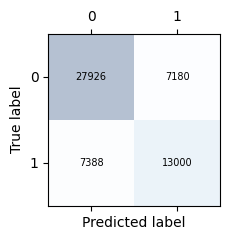

In [39]:
confmat = sklearn.metrics.confusion_matrix(y, predicted)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=7)

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('ConMatrix.png', dpi=600)
plt.show()

In [40]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79     10585
         1.0       0.64      0.64      0.64      6064

    accuracy                           0.74     16649
   macro avg       0.71      0.71      0.71     16649
weighted avg       0.74      0.74      0.74     16649



### [Optional] Let's see how ammount of training data influences accuracy 

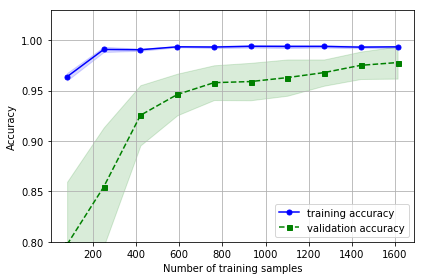

In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=nb.KNeighborsClassifier(n_neighbors=3),
                               X=X,
                               y=y,
                               train_sizes=np.linspace(0.05, 1.0, 10),
                               cv=10,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid(True)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.savefig('learning_curve.png', dpi=600)
plt.show()

## 5- Finding parameters for k-NN

In [41]:
# See parameters in
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Results with different parameters: k
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=1), X=X_train, y=y_train,  cv=10)  
print("Accuracy 1 neighbour:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=3), X=X_train, y=y_train,  cv=10)  
print("Accuracy 3 neighbours:",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=5), X=X_train, y=y_train,  cv=10)  
print("Accuracy 5 neighbours:",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=7), X=X_train, y=y_train,  cv=10)  
print("Accuracy 7 neighbours:",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=9), X=X_train, y=y_train,  cv=10)  
print("Accuracy 9 neighbours:",  np.mean(cv_scores))

Accuracy 1 neighbour: 0.7586564488572728
Accuracy 3 neighbours: 0.7236454410862239
Accuracy 5 neighbours: 0.7251129008955991
Accuracy 7 neighbours: 0.7276613490053243
Accuracy 9 neighbours: 0.7276614550404458


In [42]:
# Results with different parameters: k and distance weighting
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=1,weights='distance'), X=X_train, y=y_train,  cv=10)  
print("Accuracy 1 neighbour: and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=3,weights='distance'), X=X_train, y=y_train,  cv=10)  
print("Accuracy 3 neighbour: and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=5,weights='distance'), X=X_train, y=y_train,  cv=10)  
print("Accuracy 5 neighbour: and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=7,weights='distance'), X=X_train, y=y_train,  cv=10)  
print("Accuracy 7 neighbour: and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=9,weights='distance'), X=X_train, y=y_train,  cv=10)  
print("Accuracy 9 neighbour: and distance weighting:", np.mean(cv_scores))

Accuracy 1 neighbour: and distance weighting: 0.7586564488572728
Accuracy 3 neighbour: and distance weighting: 0.7704210389586291
Accuracy 5 neighbour: and distance weighting: 0.776805387114347
Accuracy 7 neighbour: and distance weighting: 0.782262895527571
Accuracy 9 neighbour: and distance weighting: 0.7834471023914896


### Authomatically find best parameters:

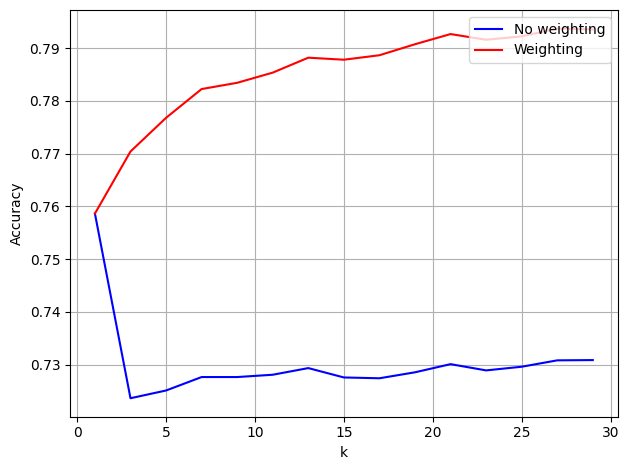

In [43]:
lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=X_train, y=y_train, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'b',label='No weighting')

lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'), X=X_train, y=y_train, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'r',label='Weighting')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.show()

### Do the same using Grid Search method in python

In [44]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=10,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_train, y_train)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 27, 'weights': 'distance'} Accuracy= 0.7937447363502976


Apply models with best parameters found trained with all training data to the test set

In [45]:
parval=clf.best_params_
knc = nb.KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print(sklearn.metrics.confusion_matrix(y_test, pred))
print(sklearn.metrics.accuracy_score(y_test, pred))

[[8739 1846]
 [1490 4574]]
0.7996276052615773


In [48]:
# interval confidence
from statsmodels.stats.proportion import proportion_confint

epsilon = sklearn.metrics.accuracy_score(y_test, pred)
print("Can approximate by Normal Distribution?: ",X_test.shape[0]*epsilon*(1-epsilon)>5)
print("Interval 95% confidence:", "{0:.3f}".format(epsilon), "+/-", "{0:.3f}".format(1.96*np.sqrt(epsilon*(1-epsilon)/X_test.shape[0])))
# or equivalent 
proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='normal')

Can approximate by Normal Distribution?:  True
Interval 95% confidence: 0.800 +/- 0.006


(0.7935474194996551, 0.8057077910234994)

In [49]:
#Using Binomial distribution

proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test')

(0.7934760786293595, 0.8056693575337901)

### Mcnemar's Test implementation

In [50]:
# Build two classifiers

# Classifier 1 (3 Neighbours) successes
y_pred = cross_val_predict(nb.KNeighborsClassifier(n_neighbors=3), X=X, y=y,  cv=10) 
res1=np.zeros(y.shape)
res1[y_pred==y]=1

# Classifier 2 (7 Neighbours) 2 successes
y_pred = cross_val_predict(nb.KNeighborsClassifier(n_neighbors=7), X=X, y=y,  cv=10) 
res2=np.zeros(y.shape)
res2[y_pred==y]=1

# Build contingency matrix
n00 = np.sum([res1[res2==1]==1])
n11 = np.sum([res1[res2==0]==0])
n10 = np.sum([res1[res2==1]==0])
n01 = np.sum([res1[res2==0]==1])

# Chi -square test
print("Have the classifiers significant different accuracy?:",(np.abs(n01-n10)-1)**2/(n01+n10)>3.84)

Have the classifiers significant different accuracy?: True


# Exercises:

### Do a 10-fold Cross-Validation using Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB  # For numerical featuresm assuming normal distribution
from sklearn.naive_bayes import MultinomialNB  # For features with counting numbers (f.i. hown many times word appears in doc)
from sklearn.naive_bayes import BernoulliNB  # For binari features (f.i. word appears or not in document)

# No parameters to tune

clf = GaussianNB()
pred = clf.fit(X_train, y_train).predict(X_test)
print(sklearn.metrics.confusion_matrix(y_test, pred))
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test')

[[6796 3789]
 [1125 4939]]

Accuracy: 0.7048471379662442

              precision    recall  f1-score   support

         0.0       0.86      0.64      0.73     10585
         1.0       0.57      0.81      0.67      6064

    accuracy                           0.70     16649
   macro avg       0.71      0.73      0.70     16649
weighted avg       0.75      0.70      0.71     16649



(0.6978531516155672, 0.7117581560386317)